In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2020-tokyo-paralympics/paralympic-medals.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-teams.csv
/kaggle/input/2020-tokyo-paralympics/entries-by-discipline.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-coaches.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-medal-tally.csv
/kaggle/input/2020-tokyo-paralympics/NPCs-list.csv
/kaggle/input/2020-tokyo-paralympics/paralympic-athletes.csv


**Introduction:**
The 2020 summer Paralympics, branded as Tokyo 2020 paralympic Games, were a major international multi-sport parasports event governed by the International Paralympic Committee and was held in Tokyo, Japan between 24 august and 5 september 2021.

**Now we are going to do the following tasks**:
* Analysis of Athletes informations in 2021
* Analysis of Teams information in Tokyo 2021
* Analysis of athletes by Gender informations in Tokyo 2021
* Analysis of medals by Country informations in Tokyo 2021

This process of investigating the dataset to discover patterns, outliers, and form hypotheses based on our understanding of the dataset is called **Exploratory Data Analysis(EDA)**, it includes clustering and dimension reduction techniques, which help to create graphical displays of high-dimensional data containing variables and univariate visualization of each field in the raw dataset, with summary statistics.


**Importing Datasets**

In [102]:
Athletes = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-athletes.csv', encoding = 'unicode_escape')
Teams = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-teams.csv', encoding = 'unicode_escape')
Medals = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-medal-tally.csv', encoding = 'unicode_escape')
Gender = pd.read_csv('../input/2020-tokyo-paralympics/entries-by-discipline.csv', encoding = 'unicode_escape')
Medals2 = pd.read_csv('../input/2020-tokyo-paralympics/paralympic-medals.csv', encoding = 'unicode_escape')

**Analysis of athletes in Tokyo paralympics 2021**

In [103]:
Athletes.shape

(4527, 7)

* The shape attribute of pandas, it stores the number of rows and columns as a tuple.
(number of rows, number of columns) present in Athletes dataset.

In [104]:
Athletes.head()

,Name,Country,CountryCode,Sport,Sport-code,Date of Birth,Gender
0,AAJIM Munkhbat,Mongolia,MGL,Judo,JUD,1989-01-25,Male
1,ABARZA Alberto,Chile,CHI,Swimming,SWM,1984-12-11,Male
2,ABASLI Namig,Azerbaijan,AZE,Judo,JUD,1997-09-12,Male
3,ABASSI Mostefa,Algeria,ALG,Wheelchair Basketball,WBK,1977-09-25,Male
4,ABBAD Abderraouf,Algeria,ALG,Wheelchair Basketball,WBK,1986-10-27,Male


* Pandas head() method will return top n (5 by default) rows of a dataframe or series.

In [105]:
def Age(x):
    return(2021-int(x.split('-')[0]))

In [106]:
Athletes['Age'] = Athletes['Date of Birth'].apply(Age)
Athletes=Athletes.drop(['Date of Birth'], axis = 1)
Athletes.head()

,Name,Country,CountryCode,Sport,Sport-code,Gender,Age
0,AAJIM Munkhbat,Mongolia,MGL,Judo,JUD,Male,32
1,ABARZA Alberto,Chile,CHI,Swimming,SWM,Male,37
2,ABASLI Namig,Azerbaijan,AZE,Judo,JUD,Male,24
3,ABASSI Mostefa,Algeria,ALG,Wheelchair Basketball,WBK,Male,44
4,ABBAD Abderraouf,Algeria,ALG,Wheelchair Basketball,WBK,Male,35


* From the above code we will get an output containing a column which shows the age of athlete instead of date of birth, Name,         Country, Country-code, sport, Sport-code and Gender of Athlete.
* Pandas drop function is used to delete the column showing date of birth of Athlete.

In [107]:
Athletes.groupby('Country')['Name'].count().sort_values(ascending=False).head(15)

Country
Japan                         262
People's Republic of China    256
RPC                           248
United States of America      243
Brazil                        241
Great Britain                 221
Australia                     181
France                        146
Ukraine                       139
Germany                       137
Spain                         137
Canada                        129
Italy                         114
Poland                         91
Turkey                         87
Name: Name, dtype: int64

* The above code gives an output showing the top 15 countries from which the most athletes competed in the paralympics.
* groupby operation is used to group large amounts of data and compute operations and split data into groups based on some criteria.

<AxesSubplot:ylabel='Country'>

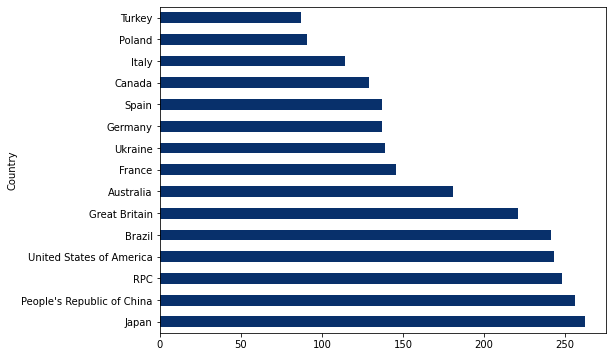

In [108]:
Athletes.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'barh', colormap = 'Blues_r', figsize = (8, 6), title = '')

* The above code gives an output containing barplots showing the top 15 countries from which the most athletes competed in the         paralympics.


In [109]:
Athletes.groupby('Gender')['Name'].count().sort_values(ascending = False)

Gender
Male      2632
Female    1895
Name: Name, dtype: int64

* The above code will let us know which gender has most participated in paralympics.

<AxesSubplot:ylabel='Name'>

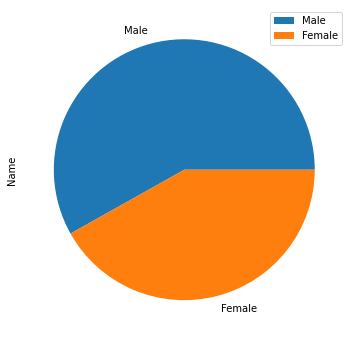

In [110]:
Athletes.groupby('Gender')['Name'].count().sort_values(ascending = False).plot(legend = True, kind = 'pie', figsize = (8, 6), title = '')

* The above code gives an output showing which gender has most participated in paralympics by representing the data using pie chart.

In [111]:
Athletes.groupby('Age')['Name'].count().sort_values(ascending = False).head(15)

Age
31    216
26    213
27    209
30    208
23    200
32    195
24    194
29    191
25    183
33    181
35    172
28    167
22    153
21    152
37    152
Name: Name, dtype: int64

* The above code gives an output showing the athletes of what ages have participated more in paralympics.

<AxesSubplot:ylabel='Age'>

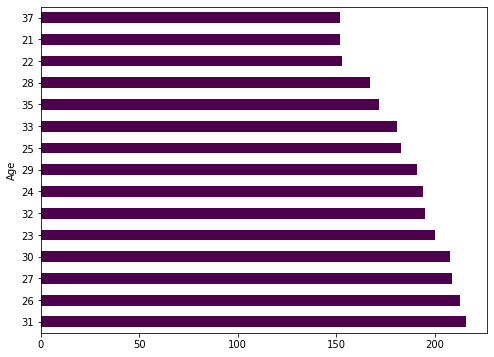

In [112]:
Athletes.groupby('Age')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'barh', colormap = 'BuPu_r', figsize = (8, 6), title = '')

* The above code gives an output showing barplots representing the athletes of what ages have participated more in paralympics.

**Observations:**
* More number of athletes from Japan have participated in paralympics when compared to other countries.
* According to gender classification more number of males have participated in paralympics when compared to number of females.
* More number of athletes with the age of 31 have participated more when compared to athletes other age groups.

**Analysis of Teams informations in Tokyo 2021**

In [113]:
Teams.shape

(212, 6)

* The above code gives an output showing number of rows, number of columns present in Teams dataset.

In [114]:
Teams.head()

,Team,Country,CountryCode,Sport,Sport-code,Event
0,Australia,Australia,AUS,Archery,ARC,Mixed Team Recurve - Open
1,Brazil,Brazil,BRA,Archery,ARC,Mixed Team - W1
2,Brazil,Brazil,BRA,Archery,ARC,Mixed Team Compound - Open
3,Brazil,Brazil,BRA,Archery,ARC,Mixed Team Recurve - Open
4,China,People's Republic of China,CHN,Archery,ARC,Mixed Team - W1


* The above code gives an output showing the information present in top 5 rows of Teams dataset. 

In [115]:
Teams = Teams.drop(['Country', 'CountryCode', 'Sport-code'], axis = 1)
Teams.head()

,Team,Sport,Event
0,Australia,Archery,Mixed Team Recurve - Open
1,Brazil,Archery,Mixed Team - W1
2,Brazil,Archery,Mixed Team Compound - Open
3,Brazil,Archery,Mixed Team Recurve - Open
4,China,Archery,Mixed Team - W1


* The above code gives an output showing the information present in top 5 rows of Teams dataset, but it does not show the information   present in columns of Country, Country code and Sport-code because we deleted them using drop function.  

In [116]:
Teams['Sport'].unique()

array(['Archery', 'Athletics', 'Boccia', 'Cycling Track',
       'Football 5-a-side', 'Goalball', 'Sitting Volleyball', 'Swimming',
       'Wheelchair Basketball', 'Wheelchair Rugby'], dtype=object)

* The unique function is used to get unique values of a series object, so the output will be the unique objects or sports that are     present under **Sport** of Teams dataset.

In [117]:
print(Teams['Event'].unique())

['Mixed Team Recurve - Open' 'Mixed Team - W1'
 'Mixed Team Compound - Open' '4x100m Universal Relay' 'Team - BC1/BC2'
 'Pairs - BC3' 'Pairs - BC4' 'Mixed C1-5 750m Team Sprint' 'Men' 'Women'
 "Men's 4x100m Freestyle Relay - 34 Points"
 "Men's 4x100m Medley Relay - 34 Points"
 'Mixed 4x100m Freestyle Relay - S14'
 "Women's 4x100m Freestyle Relay - 34 Pts"
 "Women's 4x100m Medley Relay - 34 Points"
 'Mixed 4x100m Freestyle Relay - 49 Points'
 'Mixed 4x50m Freestyle Relay - 20 Points' 'Mixed']


* The output of above code will be the unique Events that are happened in 2021 paralympics. 

In [118]:
Teams.groupby('Sport')['Team'].count().sort_values(ascending = False)

Sport
Swimming                 57
Archery                  32
Boccia                   30
Wheelchair Basketball    22
Goalball                 20
Sitting Volleyball       16
Athletics                10
Cycling Track             9
Football 5-a-side         8
Wheelchair Rugby          8
Name: Team, dtype: int64

* The above code gives an output showing number of teams participated in each sport.

<AxesSubplot:title={'center':'number of teams per play'}, ylabel='Sport'>

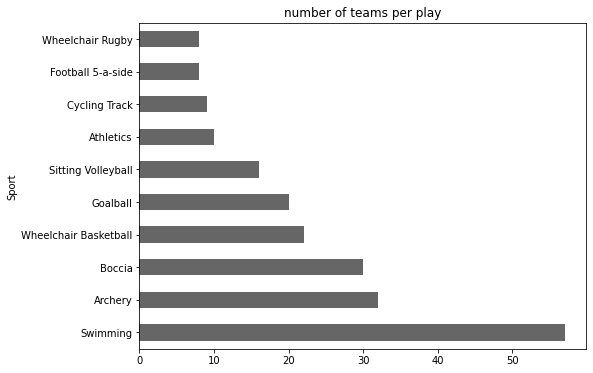

In [119]:
Teams.groupby('Sport')['Team'].count().sort_values(ascending = False).plot(legend = False, kind = 'barh', colormap = 'Accent_r', figsize = (8, 6), title = 'number of teams per play')

* The above code gives output of barplot showing number of teams participated in each sport.

In [120]:
Men_Teams = Teams[Teams['Event']=='Men']
Men_Teams.head()

,Team,Sport,Event
81,Argentina,Football 5-a-side,Men
82,Brazil,Football 5-a-side,Men
83,China,Football 5-a-side,Men
84,France,Football 5-a-side,Men
85,Japan,Football 5-a-side,Men


* The above code gives an output showing the men teams participated in Paralympics.

In [121]:
Men_Teams.groupby('Sport')['Team'].count().sort_values(ascending = False)

Sport
Wheelchair Basketball    12
Goalball                 10
Football 5-a-side         8
Sitting Volleyball        8
Name: Team, dtype: int64

* The above code gives an output showing the number of men teams participated in each sport. 

<AxesSubplot:ylabel='Team'>

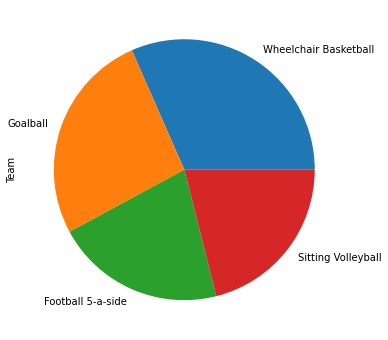

In [122]:
Men_Teams.groupby('Sport')['Team'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', figsize = (8, 6), title = '')

The above code gives an output of piechart showing the number of men teams participated in each sport. 

In [123]:
Women_Teams = Teams[Teams['Event']=='Women']
Women_Teams.head()

,Team,Sport,Event
90,Australia,Goalball,Women
93,Brazil,Goalball,Women
94,Canada,Goalball,Women
96,China,Goalball,Women
97,Egypt,Goalball,Women


* The above code gives an output showing the women teams participated in Paralympics.

In [124]:
Women_Teams.groupby('Sport')['Team'].count().sort_values(ascending=False)

Sport
Goalball                 10
Wheelchair Basketball    10
Sitting Volleyball        8
Name: Team, dtype: int64

* The above code gives an output showing the number of women teams participated in each sport. 

<AxesSubplot:ylabel='Team'>

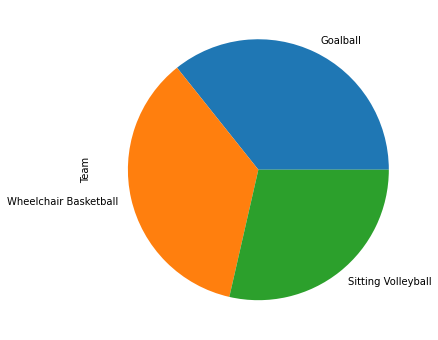

In [125]:
Women_Teams.groupby('Sport')['Team'].count().sort_values(ascending = False).plot(legend=False, kind = 'pie', figsize=(8, 6), title='')

The above code gives an output of piechart showing the number of women teams participated in each sport. 

In [126]:
Mixed_Teams = Teams[Teams['Event']=='Mixed']
Mixed_Teams.head()

,Team,Sport,Event
204,Australia,Wheelchair Rugby,Mixed
205,Canada,Wheelchair Rugby,Mixed
206,Denmark,Wheelchair Rugby,Mixed
207,France,Wheelchair Rugby,Mixed
208,Great Britain,Wheelchair Rugby,Mixed


The above code gives an output showing the number of mixed teams participated in each sport. 

In [127]:
Teams[(Teams['Sport']=='Wheelchair Basketball') & (Teams['Event']=='Men')]

,Team,Sport,Event
182,Algeria,Wheelchair Basketball,Men
184,Australia,Wheelchair Basketball,Men
186,Canada,Wheelchair Basketball,Men
189,Colombia,Wheelchair Basketball,Men
190,Germany,Wheelchair Basketball,Men
192,Great Britain,Wheelchair Basketball,Men
194,Islamic Rep. of Iran,Wheelchair Basketball,Men
195,Japan,Wheelchair Basketball,Men
198,Republic of Korea,Wheelchair Basketball,Men
199,Spain,Wheelchair Basketball,Men


* The above code gives an output showing the men teams participated in Wheelchair Basketball game.

In [128]:
Teams[(Teams['Sport']=='Wheelchair Basketball') & (Teams['Event']=='Women')]

,Team,Sport,Event
183,Algeria,Wheelchair Basketball,Women
185,Australia,Wheelchair Basketball,Women
187,Canada,Wheelchair Basketball,Women
188,China,Wheelchair Basketball,Women
191,Germany,Wheelchair Basketball,Women
193,Great Britain,Wheelchair Basketball,Women
196,Japan,Wheelchair Basketball,Women
197,Netherlands,Wheelchair Basketball,Women
200,Spain,Wheelchair Basketball,Women
203,United States,Wheelchair Basketball,Women


* The above code gives an output showing the women teams participated in Wheelchair Basketball game.

**Observations:**
* We observed the unique sports and events that had taken place in Paralympics.
* We also observed the performance analysis of males and females in 2021 Paralympics.

**Analysis of Athletes by Gender in Tokyo 2021**

In [129]:
Gender.head()

,Discipline,F,M,Total
0,Archery,60,79,139
1,Athletics,489,653,1142
2,Badminton,44,46,90
3,Boccia,41,73,114
4,Canoe Sprint,40,51,91


* The above code gives an output showing the information present in top 5 rows of Gender dataset. 

In [130]:
Gender['F%'] = (Gender['F'] / Gender['Total']) * 100
Gender['M%'] = (Gender['M'] / Gender['Total']) * 100

In [131]:
female = Gender.sort_values(['F'], ascending = False).drop(['M', 'Total', 'F%', 'M%'], axis = 1).head(10)
female

,Discipline,F
1,Athletics,489
15,Swimming,263
19,Wheelchair Basketball,118
16,Table Tennis,105
14,Sitting Volleyball,92
11,Powerlifting,88
5,Cycling Road,74
0,Archery,60
9,Goalball,58
10,Judo,56


* The above code gives an output showing the top 10 sports in which most of the females were participated.

<AxesSubplot:xlabel='F', ylabel='Discipline'>

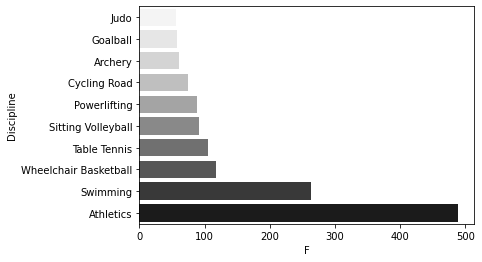

In [132]:
sns.barplot(y = 'Discipline', x = 'F', data = female.sort_values(['F']), palette = 'Greys')

* The above code gives an output of barplot showing the top 10 sports in which most of the females were participated.

In [133]:
male2 = Gender.sort_values(['M'], ascending = False).drop(['F', 'Total', 'F%', 'M%'], axis = 1).tail(10)
male2

,Discipline,M
6,Cycling Track,72
22,Wheelchair Tennis,72
9,Goalball,60
12,Rowing,52
4,Canoe Sprint,51
20,Wheelchair Fencing,48
2,Badminton,46
18,Triathlon,40
17,Taekwondo,36
7,Equestrian,22


* The above code gives an output showing the top 10 sports in which most of the males were participated.

In [134]:
female_per = Gender.sort_values(['F%'], ascending = False).drop(['F', 'Total', 'M', 'M%'], axis = 1).head(10)
female_per

,Discipline,F%
7,Equestrian,71.428571
12,Rowing,51.851852
20,Wheelchair Fencing,50.000000
18,Triathlon,50.000000
11,Powerlifting,49.438202
17,Taekwondo,49.295775
14,Sitting Volleyball,49.197861
9,Goalball,49.152542
2,Badminton,48.888889
19,Wheelchair Basketball,45.038168


* The above code gives an output showing the percentage of female participated in top 10 sports in paralympics.

<AxesSubplot:xlabel='F%', ylabel='Discipline'>

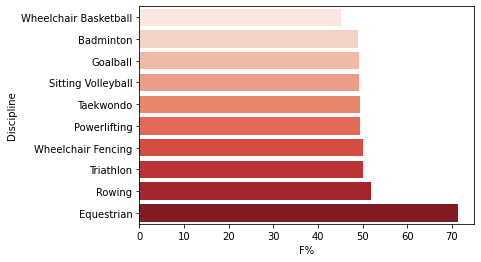

In [135]:
sns.barplot(y = 'Discipline', x = 'F%', data = female_per.sort_values(['F%']), palette = 'Reds')

* The above code gives an output of barplot showing the percentage of female participated in top 10 sports in paralympics.

In [136]:
male_per = Gender.sort_values(['M%'], ascending = False).drop(['F', 'Total', 'M', 'F%'], axis = 1).head(10)
male_per

,Discipline,M%
8,Football 5-a-side,100.000000
21,Wheelchair Rugby,95.652174
22,Wheelchair Tennis,69.230769
5,Cycling Road,65.258216
13,Shooting,64.935065
3,Boccia,64.035088
6,Cycling Track,62.608696
16,Table Tennis,62.230216
10,Judo,58.823529
1,Athletics,57.180385


* The above code gives an output showing the percentage of male participated in top 10 sports in paralympics.

<AxesSubplot:xlabel='M%', ylabel='Discipline'>

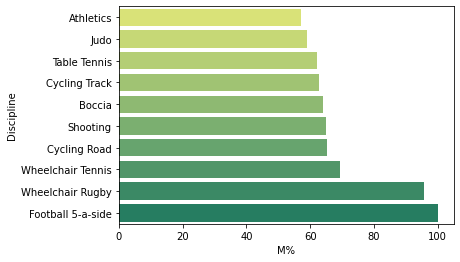

In [137]:
sns.barplot(y = 'Discipline', x = 'M%', data = male_per.sort_values(['M%']), palette = 'summer_r')

* The above code gives an output of barplot showing the percentage of male participated in top 10 sports in paralympics.

In [138]:
both_genders = Gender.sort_values(['Total'], ascending = False).drop(['F', 'M%', 'M', 'F%'], axis = 1).head(10)
both_genders

,Discipline,Total
1,Athletics,1142
15,Swimming,604
16,Table Tennis,278
19,Wheelchair Basketball,262
5,Cycling Road,213
14,Sitting Volleyball,187
11,Powerlifting,178
13,Shooting,154
0,Archery,139
10,Judo,136


* The above code gives an output showing the percentage of teams of both genders participated in top 10 sports in paralympics.

<AxesSubplot:xlabel='Total', ylabel='Discipline'>

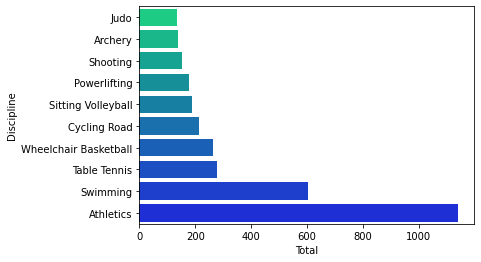

In [139]:
sns.barplot(y='Discipline', x = 'Total', data = both_genders.sort_values(['Total']), palette = 'winter_r')

* The above code gives an output of barplot showing the percentage of teams of both genders participated in top 10 sports in           paralympics.

**Observations:**
* We observed the performance analysis of male, female and both the genders with respect to each sport that had taken place in 2021     Paralympics.

**Analysis of medals by country in Tokyo 2021**

In [140]:
Medals.head()

,Rank,Country,Country-Code,Gold,Silver,Bronze,Total,Rank-by-Total
0,1,People's Republic of China,CHN,96,60,51,207,1
1,2,Great Britain,GBR,41,38,45,124,2
2,3,United States of America,USA,37,36,31,104,4
3,4,RPC,RPC,36,33,49,118,3
4,5,Netherlands,NED,25,17,17,59,9


* The above code gives an output showing the information present in top 5 rows of Medals dataset. 

In [141]:
Medals = Medals.drop(['Rank', 'Rank-by-Total', 'Country-Code'], axis = 1)
Medals.head()

,Country,Gold,Silver,Bronze,Total
0,People's Republic of China,96,60,51,207
1,Great Britain,41,38,45,124
2,United States of America,37,36,31,104
3,RPC,36,33,49,118
4,Netherlands,25,17,17,59


* The above code gives an output showing the information present in top 5 rows of Medals dataset, but it does not show the             information present in columns of Rank, Rank-by-total, Country code because we deleted them using drop function.  

In [142]:
Medals.shape

(86, 5)

* The above code gives an output showing number of rows, number of columns present in Medals dataset.

In [143]:
Med_Go = Medals.sort_values(['Gold'], ascending = False).drop(['Silver', 'Bronze', 'Total'], axis = 1).head(10)
Med_Go

,Country,Gold
0,People's Republic of China,96
1,Great Britain,41
2,United States of America,37
3,RPC,36
4,Netherlands,25
5,Ukraine,24
6,Brazil,22
7,Australia,21
8,Italy,14
9,Azerbaijan,14


* The above code gives an output showing the top 10 countries which achieved the most gold medals in paralympics.

<AxesSubplot:xlabel='Gold', ylabel='Country'>

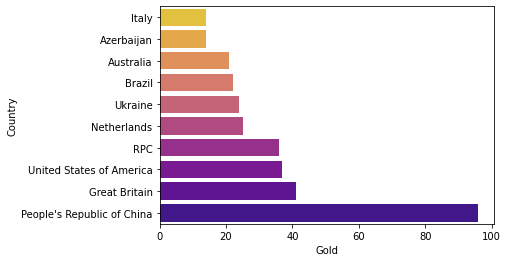

In [144]:
sns.barplot(y = 'Country', x = 'Gold', data = Med_Go.sort_values(['Gold']),palette = 'plasma_r')

* The above code gives an output of barplot(graphical visualisation showing the top 10 countries which achieved the most gold medals   in paralympics.

In [145]:
Medals.sort_values(['Gold'], ascending = False).drop(['Silver', 'Bronze', 'Total'], axis = 1).tail(20)

,Country,Gold
79,Kenya,0
82,Oman,0
81,Montenegro,0
83,Qatar,0
84,Chinese Taipei,0
74,Vietnam,0
75,Lithuania,0
65,Latvia,0
73,Slovenia,0
72,Romania,0


* The above code gives an output showing 20 countries which achieved the least gold medals in paralympics.

In [146]:
Med_sil = Medals.sort_values(['Silver'], ascending = False).drop(['Gold', 'Bronze', 'Total'], axis = 1).head(10)
Med_sil

,Country,Silver
0,People's Republic of China,60
5,Ukraine,47
1,Great Britain,38
2,United States of America,36
3,RPC,33
7,Australia,29
8,Italy,29
6,Brazil,20
4,Netherlands,17
13,France,15


* The above code gives an output showing the top 10 countries which achieved the most silver medals in paralympics.

<AxesSubplot:xlabel='Silver', ylabel='Country'>

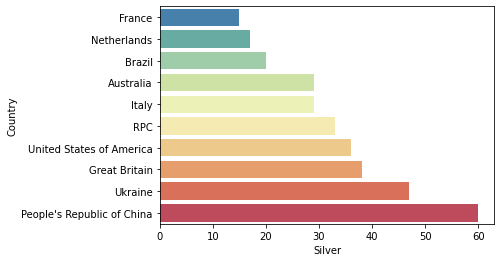

In [147]:
sns.barplot(y = 'Country', x = 'Silver', data = Med_sil.sort_values(['Silver']), palette = 'Spectral_r')

* The above code gives an output of barplot showing the top 10 countries which achieved the most silver medals in paralympics.

In [148]:
Med_Bro = Medals.sort_values(['Bronze'], ascending = False).drop(['Gold', 'Silver', 'Total'],axis = 1).head(10)
Med_Bro

,Country,Bronze
0,People's Republic of China,51
3,RPC,49
1,Great Britain,45
2,United States of America,31
6,Brazil,30
7,Australia,30
13,France,28
5,Ukraine,27
8,Italy,26
10,Japan,23


* The above code gives an output showing the top 10 countries which achieved the most bronze medals in paralympics.

<AxesSubplot:xlabel='Bronze', ylabel='Country'>

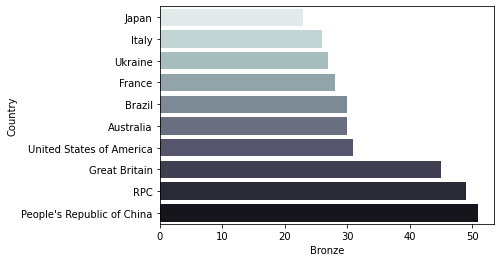

In [149]:
sns.barplot(y = 'Country', x = 'Bronze', data = Med_Bro.sort_values(['Bronze']),palette = 'bone_r')

* The above code gives an output of barplot showing the top 10 countries which achieved the most bronze medals in paralympics.

In [150]:
Med_Total = Medals.sort_values(['Total'], ascending = False).drop(['Gold', 'Silver', 'Bronze'], axis = 1).head(10)
Med_Total

,Country,Total
0,People's Republic of China,207
1,Great Britain,124
3,RPC,118
2,United States of America,104
5,Ukraine,98
7,Australia,80
6,Brazil,72
8,Italy,69
4,Netherlands,59
13,France,54


* The above code gives an output showing the top 10 countries which achieved the most medals in paralympics.

<AxesSubplot:xlabel='Total', ylabel='Country'>

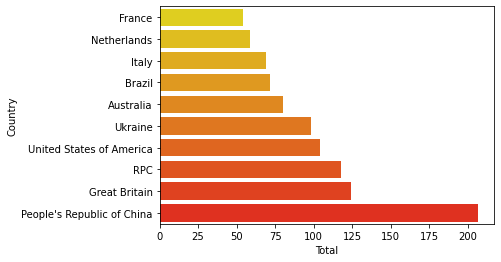

In [151]:
sns.barplot(y = 'Country', x = 'Total', data = Med_Total.sort_values(['Total']), palette = 'autumn_r')

* The above code gives an output of barplot showing the top 10 countries which achieved the most medals in paralympics.

In [152]:
Medals2.head()

,Country,CountryCode,Name,Sport,Sport-short,Event,Medal
0,Czech Republic,CZE,DRAHONINSKY David,Archery,ARC,Men's Individual - W1,Gold Medal
1,People's Republic of China,CHN,HE Zihao,Archery,ARC,Men's Individual Compound - Open,Gold Medal
2,United States of America,USA,MATHER Kevin,Archery,ARC,Men's Individual Recurve - Open,Gold Medal
3,People's Republic of China,CHN,CHEN Minyi,Archery,ARC,Women's Individual - W1,Gold Medal
4,Great Britain,GBR,PATERSON PINE Phoebe,Archery,ARC,Women's Individual Compound - Open,Gold Medal


* The above code gives an output showing the information present in top 5 rows of Medals2 dataset. 

In [153]:
Medals2 = Medals2.drop(['CountryCode', 'Sport-short', 'Event'], axis = 1)
Medals2.head()

,Country,Name,Sport,Medal
0,Czech Republic,DRAHONINSKY David,Archery,Gold Medal
1,People's Republic of China,HE Zihao,Archery,Gold Medal
2,United States of America,MATHER Kevin,Archery,Gold Medal
3,People's Republic of China,CHEN Minyi,Archery,Gold Medal
4,Great Britain,PATERSON PINE Phoebe,Archery,Gold Medal


* The above code gives an output showing the information present in top 5 rows of Medals2 dataset, but it does not show the information   present in columns of Event, CountryCode and Sport-short because we deleted them using drop function.  

In [154]:
Medals2['Country'].unique()

array(['Czech Republic', "People's Republic of China",
       'United States of America', 'Great Britain',
       'Islamic Republic of Iran', 'RPC', 'Greece', 'Norway', 'Ireland',
       'Tunisia', 'Brazil', 'Belgium', 'Thailand', 'Germany', 'Canada',
       'Japan', 'Switzerland', 'Finland', 'South Africa', 'Costa Rica',
       'Spain', 'Morocco', 'Algeria', 'France', 'Australia', 'Mexico',
       'Pakistan', 'Poland', 'Colombia', 'Sri Lanka', 'Azerbaijan',
       'India', 'Malaysia', 'Ukraine', 'Cuba', 'Jordan', 'Uzbekistan',
       'Venezuela', 'Italy', 'Netherlands', 'Ethiopia', 'New Zealand',
       'Nigeria', 'Hungary', 'Ecuador', 'Chile', 'Indonesia', 'Slovakia',
       'Republic of Korea', 'Austria', 'Denmark', 'Turkey', 'Mongolia',
       'Kazakhstan', 'United Arab Emirates', 'Serbia', 'Sweden', 'Israel',
       'Belarus', 'Singapore', 'Cyprus', 'Peru', 'Kuwait', 'Bulgaria',
       'Namibia', 'Croatia', 'Argentina', 'Iraq', 'Latvia',
       'Hong Kong, China', 'Romania', 'Geor

* The unique function is used to get unique values of a series object, so the output will be the unique objects or countries that are   participated in Paralympics.

In [155]:
Medals2['Sport'].unique()

array(['Archery', 'Athletics', 'Badminton', 'Boccia', 'Canoe Sprint',
       'Cycling Road', 'Cycling Track', 'Equestrian', 'Football 5-a-side',
       'Goalball', 'Judo', 'Powerlifting', 'Rowing', 'Shooting',
       'Sitting Volleyball', 'Swimming', 'Table Tennis', 'Taekwondo',
       'Triathlon', 'Wheelchair Basketball', 'Wheelchair Fencing',
       'Wheelchair Rugby', 'Wheelchair Tennis'], dtype=object)

* The unique function is used to get unique values of a series object, so the output will be the unique objects or sports that are     conducted in Paralympics.

**Let us know about the results of Archery in 2021 Paralympics.**

In [156]:
Arch_gold = Medals2[(Medals2['Sport'] == 'Archery') & (Medals2['Medal'] == 'Gold Medal')]
Arch_gold

,Country,Name,Sport,Medal
0,Czech Republic,DRAHONINSKY David,Archery,Gold Medal
1,People's Republic of China,HE Zihao,Archery,Gold Medal
2,United States of America,MATHER Kevin,Archery,Gold Medal
3,People's Republic of China,CHEN Minyi,Archery,Gold Medal
4,Great Britain,PATERSON PINE Phoebe,Archery,Gold Medal
5,Islamic Republic of Iran,NEMATI Zahra,Archery,Gold Medal
6,People's Republic of China,CHEN Minyi,Archery,Gold Medal
7,People's Republic of China,ZHANG Tianxin,Archery,Gold Medal
8,People's Republic of China,HE Zihao,Archery,Gold Medal
9,People's Republic of China,LIN Yueshan,Archery,Gold Medal


* The above code gives an output showing the countries and the teams that are participated and achieved gold medals in Archery.

<AxesSubplot:ylabel='Name'>

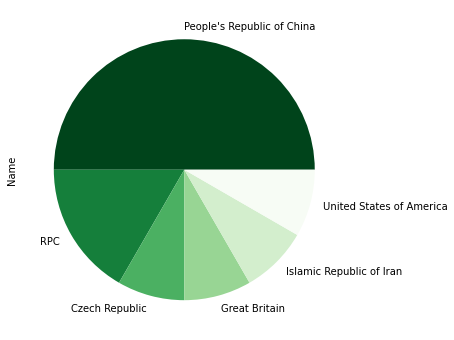

In [157]:
Arch_gold.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most gold medals in Archery.

In [158]:
arch_sil = Medals2[(Medals2['Sport'] == 'Archery') & (Medals2['Medal'] == 'Silver Medal')]
arch_sil

,Country,Name,Sport,Medal
698,Turkey,TURKMENOGLU Nihat,Archery,Silver Medal
699,Islamic Republic of Iran,BIABANI Ramezan,Archery,Silver Medal
700,People's Republic of China,ZHAO Lixue,Archery,Silver Medal
701,Czech Republic,MUSILOVA Sarka,Archery,Silver Medal
702,Chile,ZUNIGA VARELA Mariana,Archery,Silver Medal
703,Italy,PETRILLI Vincenza,Archery,Silver Medal
704,Czech Republic,DRAHONINSKY David,Archery,Silver Medal
705,Czech Republic,MUSILOVA Sarka,Archery,Silver Medal
706,Turkey,CURE Oznur,Archery,Silver Medal
707,Turkey,KORKMAZ Bulent,Archery,Silver Medal


* The above code gives an output showing the information of countries and teams that are participated and achieved Silver medals in     Archery.

<AxesSubplot:ylabel='Name'>

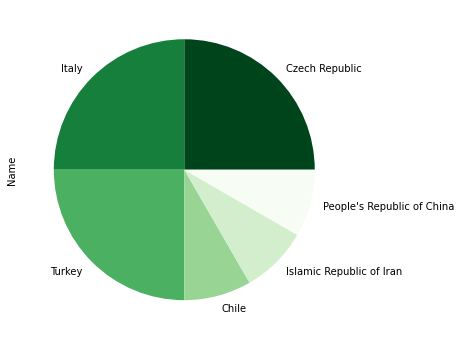

In [159]:
arch_sil.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize=(8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most Silver medals in Archery.

In [160]:
arch_bronz = Medals2[(Medals2['Sport'] == 'Archery') & (Medals2['Medal'] == 'Bronze Medal')]
arch_bronz

,Country,Name,Sport,Medal
1389,Turkey,HEKIMOGLU Bahattin,Archery,Bronze Medal
1390,People's Republic of China,AI Xinliang,Archery,Bronze Medal
1391,India,SINGH Harvinder,Archery,Bronze Medal
1392,Great Britain,RUMARY Victoria,Archery,Bronze Medal
1393,Italy,VIRGILIO Maria Andrea,Archery,Bronze Medal
1394,People's Republic of China,WU Chunyan,Archery,Bronze Medal
1395,RPC,KRUTOVA Elena,Archery,Bronze Medal
1396,RPC,LEONOV Aleksei,Archery,Bronze Medal
1397,RPC,ARTAKHINOVA Stepanida,Archery,Bronze Medal
1398,RPC,SHIGAEV Bair,Archery,Bronze Medal


* The above code gives an output showing the countries and teams which participated and achieved bronze medals in Archery.

<AxesSubplot:ylabel='Name'>

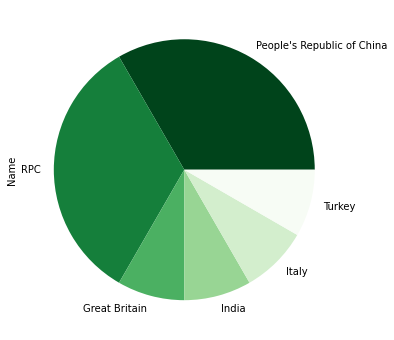

In [161]:
arch_bronz.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most bronze medals in Archery.

**Let us know about the results of Athletics in 2021 Paralympics.**

In [162]:
Athle_gold = Medals2[(Medals2['Sport'] == 'Athletics') & (Medals2['Medal'] == 'Gold Medal')]
Athle_gold.groupby('Country')['Name'].count().sort_values(ascending = False)

Country
People's Republic of China    27
United States of America      13
RPC                           12
Great Britain                  9
Brazil                         8
Switzerland                    7
Ukraine                        6
Islamic Republic of Iran       5
Uzbekistan                     5
Poland                         5
Spain                          4
Germany                        4
Morocco                        4
Australia                      4
Cuba                           4
Thailand                       4
Tunisia                        4
Azerbaijan                     4
South Africa                   3
New Zealand                    3
Netherlands                    3
Algeria                        3
Japan                          3
Venezuela                      3
Mexico                         2
Canada                         2
Finland                        1
Belgium                        1
Chile                          1
Colombia                       1
Co

* The above code gives an output showing the countries which achieved gold medals in Athletics.

<AxesSubplot:ylabel='Name'>

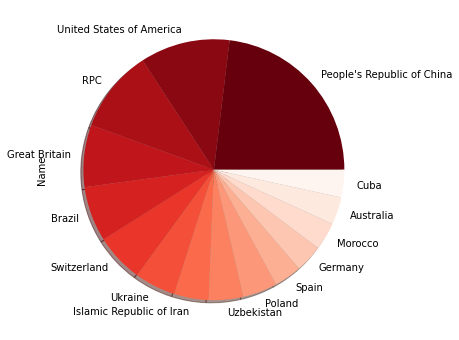

In [163]:
Athle_gold.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Reds_r', shadow = True, figsize = (8, 6))

* The above code gives an output of piechart showing the top 15 countries which achieved the most gold medals in Athletics.

In [164]:
Athle_silv = Medals2[(Medals2['Sport'] == 'Athletics') & (Medals2['Medal'] == 'Silver Medal')]
Athle_silv.groupby('Country')['Name'].count().sort_values(ascending = False)

Country
United States of America      17
Ukraine                       15
RPC                           13
People's Republic of China    13
Brazil                         9
Great Britain                  8
Australia                      7
Islamic Republic of Iran       6
India                          5
Tunisia                        5
Germany                        5
Morocco                        4
Italy                          4
Algeria                        4
Canada                         4
Spain                          4
Poland                         3
Switzerland                    3
Japan                          3
Colombia                       3
France                         3
Finland                        3
Croatia                        2
New Zealand                    2
Uzbekistan                     2
Bulgaria                       2
Thailand                       2
Greece                         2
Venezuela                      2
Netherlands                    2
Ar

* The above code gives an output showing the countries which achieved silver medals in Athletics.

<AxesSubplot:ylabel='Name'>

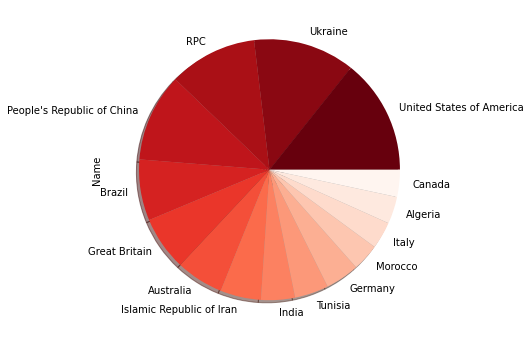

In [165]:
Athle_silv.groupby('Country')['Name'].count().sort_values(ascending = False).head(15).plot(legend = False, kind = 'pie', colormap = 'Reds_r', shadow = True, figsize = (8, 6))

* The above code gives an output of piechart showing the countries which achieved the most silver medals in Athletics.

**Let us know about the results of India in 2021 Paralympics.**

In [166]:
gold = Medals2[(Medals2['Country'] == 'India') & (Medals2['Medal'] == 'Gold Medal')]
gold.groupby('Sport')['Name'].count().sort_values(ascending  = False)

Sport
Badminton    2
Shooting     2
Athletics    1
Name: Name, dtype: int64

* The above gives an output showing the Sports in which India achieved gold medals in paralympics.

<AxesSubplot:ylabel='Name'>

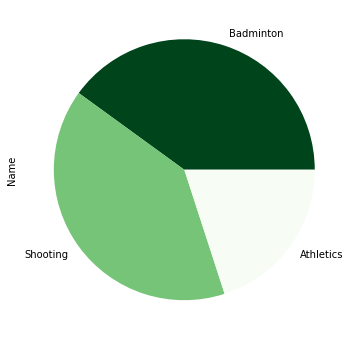

In [167]:
gold.groupby('Sport')['Name'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above gives an output of pie chart showing the Sports in which India achieved gold medals in paralympics.

In [168]:
silv = Medals2[(Medals2['Country'] == 'India') & (Medals2['Medal'] == 'Silver Medal')]
silv.groupby('Sport')['Name'].count().sort_values(ascending  = False)

Sport
Athletics       5
Badminton       1
Shooting        1
Table Tennis    1
Name: Name, dtype: int64

* The above gives an output showing the Sports in which India achieved Silver medals in paralympics.

<AxesSubplot:ylabel='Name'>

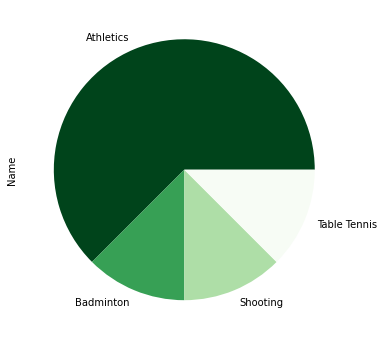

In [169]:
silv.groupby('Sport')['Name'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above gives an output showing the Sports in which India achieved Silver medals in paralympics.

In [170]:
bronz = Medals2[(Medals2['Country'] == 'India') & (Medals2['Medal'] == 'Bronze Medal')]
bronz.groupby('Sport')['Name'].count().sort_values(ascending  = False)

Sport
Athletics    2
Shooting     2
Archery      1
Badminton    1
Name: Name, dtype: int64

* The above gives an output showing the Sports in which India achieved Bronze medals in paralympics.

<AxesSubplot:ylabel='Name'>

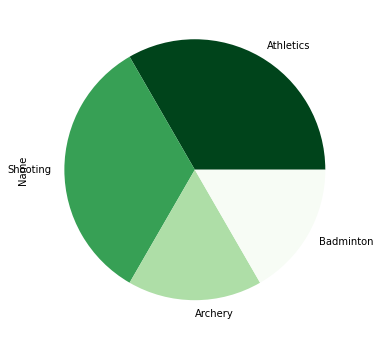

In [171]:
bronz.groupby('Sport')['Name'].count().sort_values(ascending = False).plot(legend = False, kind = 'pie', colormap = 'Greens_r', figsize = (8, 6))

* The above gives an output of piechart showing the Sports in which India achieved Bronze medals in paralympics.

In [172]:

Medals[['Country', 'Bronze', 'Silver', 'Gold', 'Total']].iloc[:15].style.set_caption('Paralympics Top 15 Countries')\
.bar(subset = ['Gold'], color = '#f0c05a')\
.bar(subset = ['Silver'], color = 'Lightgray')\
.bar(subset = ['Bronze'], color = '#a97142')\


,Country,Bronze,Silver,Gold,Total
0,People's Republic of China,51,60,96,207
1,Great Britain,45,38,41,124
2,United States of America,31,36,37,104
3,RPC,49,33,36,118
4,Netherlands,17,17,25,59
5,Ukraine,27,47,24,98
6,Brazil,30,20,22,72
7,Australia,30,29,21,80
8,Italy,26,29,14,69
9,Azerbaijan,4,1,14,19


* The above code gives an output showing performance analysis of top 14 countries in 2021 Paralympics.

In [173]:
India = Medals.loc[Medals['Country'] == 'India']
India

,Country,Gold,Silver,Bronze,Total
23,India,5,8,6,19


* The above code gives an output showing performance analysis of India in paralympics.

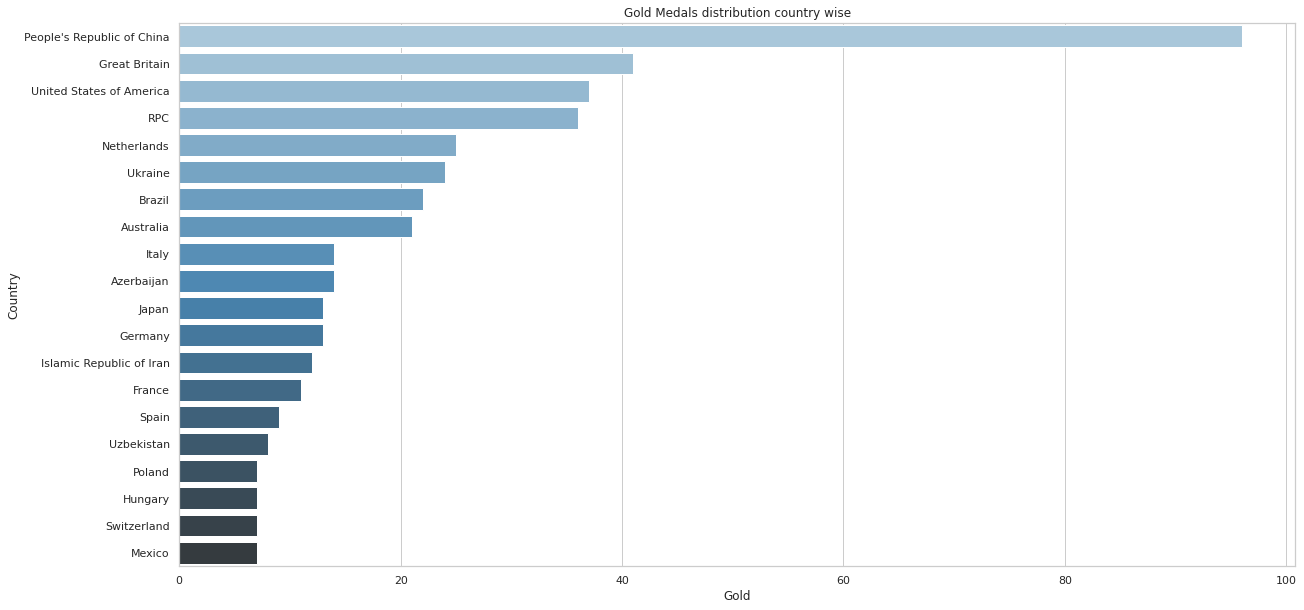

In [174]:
plt.figure(figsize=(20, 10))
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Gold', y = 'Country', color = '#828A95', data = Medals[:20], palette = 'Blues_d')
plt.title('Gold Medals distribution country wise')
plt.show()

* The above code gives an output showing barplots which represents the distribution of Gold medals between top 20 countries in       paralympics.

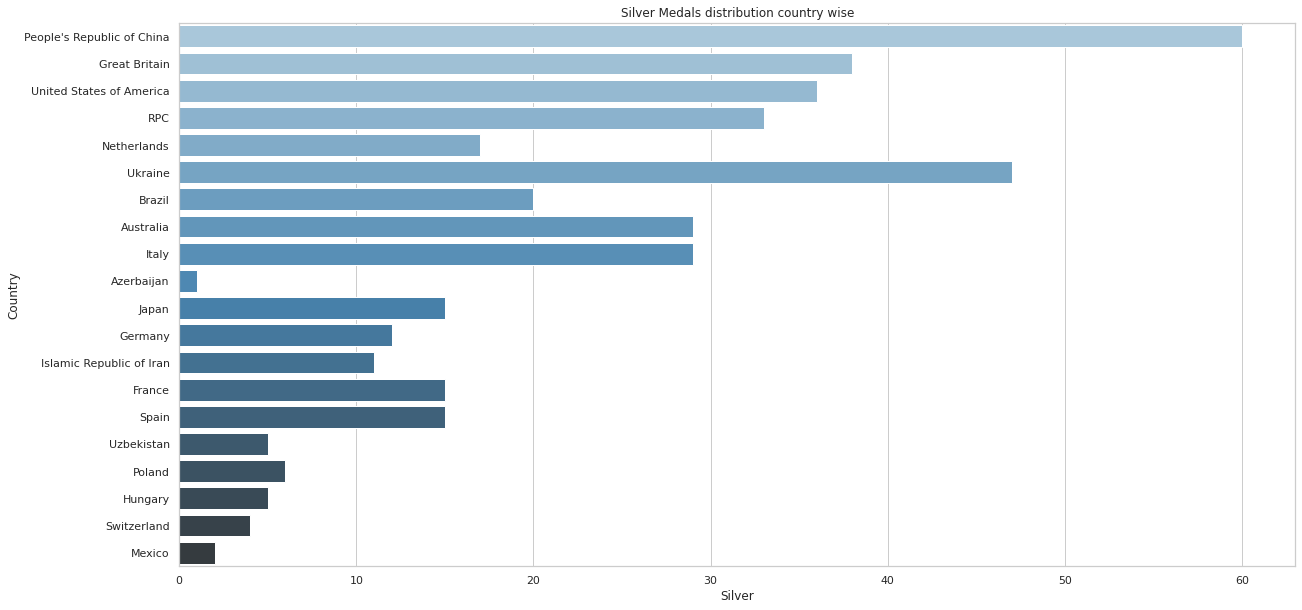

In [175]:
plt.figure(figsize=(20, 10))
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Silver', y = 'Country', color = '#828A95', data = Medals[:20], palette = 'Blues_d')
plt.title('Silver Medals distribution country wise')
plt.show()

* The above code gives an output showing barplots which represents the distribution of Silver medals between top 20 countries in       paralympics.

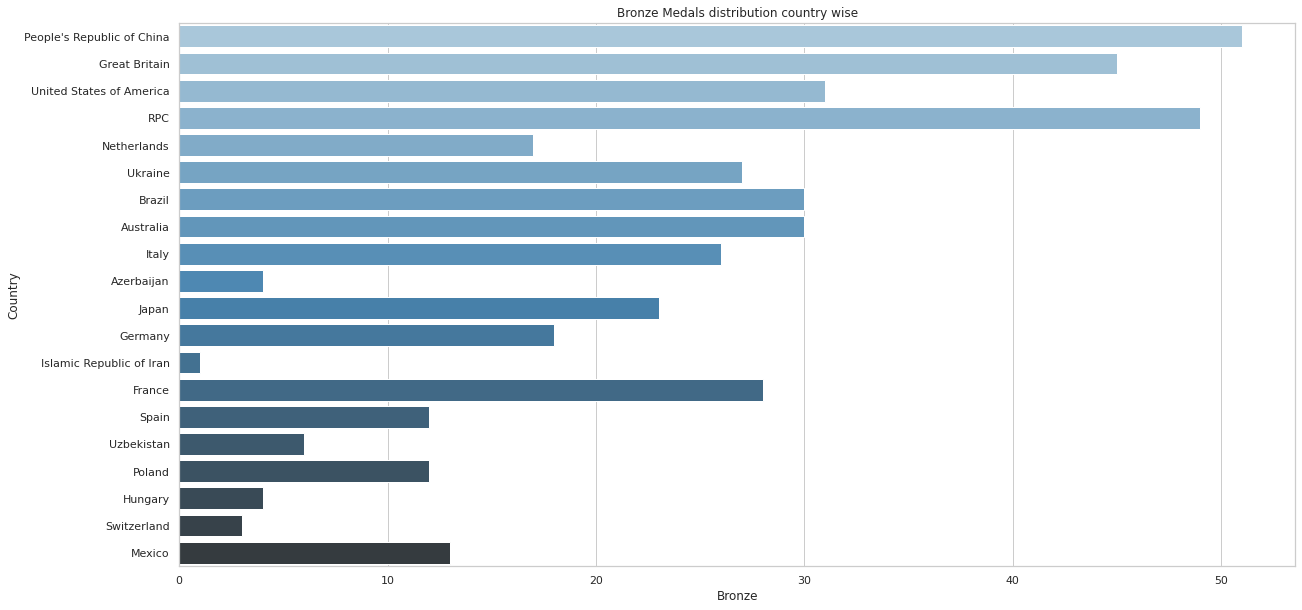

In [176]:
plt.figure(figsize=(20, 10))
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Bronze', y = 'Country', color = '#828A95', data = Medals[:20], palette = 'Blues_d')
plt.title('Bronze Medals distribution country wise')
plt.show()

* The above code gives an output showing barplots which represents the bronze medal distribution between the top 20 countries in       paralympics.

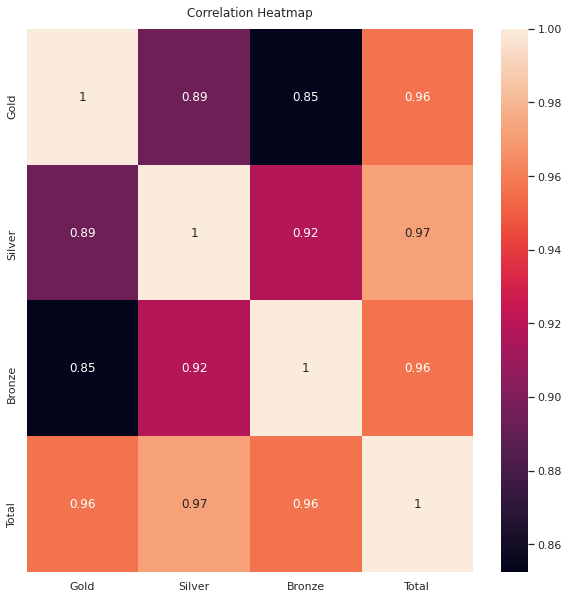

In [177]:
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(Medals.corr(), annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12);

* The above code gives an output showing the correlation of the dataframe in the form of heatmap, which contains values representing   various shades of same colour for each value to be plotted and the darker shades represents the higher values than the lighter       shades.

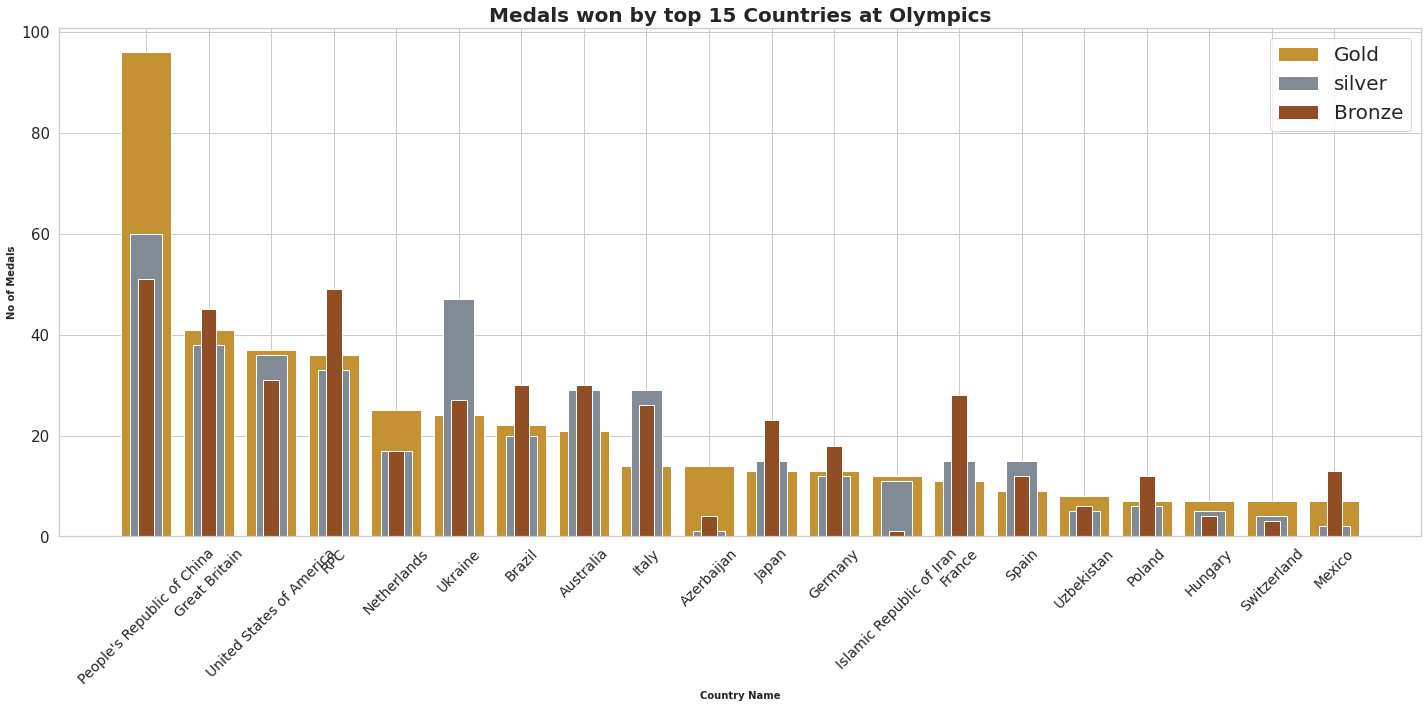

In [178]:
fig, ax = plt.subplots(figsize = (20, 10))
top_20 = Medals[:20]
plt.bar(top_20['Country'].values, top_20['Gold'].values, color = '#C49133', label = 'Gold' ,)
plt.bar(top_20['Country'].values, top_20['Silver'].values, width = 0.5, color  = '#828A95', label ='silver')
plt.bar(top_20['Country'].values, top_20['Bronze'].values, width = 0.25, color = '#914E24', label = 'Bronze')
plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize = 20)
plt.xlabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.xticks(fontsize = 14, rotation  = 45)
plt.tight_layout()
plt.show()

* The above code gives an output of graphical representation of medals won by top 15 countries in paralympics using barplots.

**Observations:**
* We observed that the countries like China, Great Britan, USA had achieved most of the medals in 2021 Paralympics when compared to     other countries.
* We also observed the performance analysis and the results of India in each sport with the help of barplots and piecharts.